In [16]:
import numpy as np
import matplotlib.pyplot as plt
from euler import euler  # Assuming you have a function called euler in a module named euler
import ipywidgets as widgets
from ipywidgets import interact

# Define the function F with sigma and b as constants
sigma = 10
b = 8/3

# Time parameters
t0 = 0
tmax = 10
dt = 0.01

# Initial X and Z conditions (since only Y will be varied)
x0 = [0, 1, 0]

# Function to update plots based on r and initial Y value
def plot_lorenz_system(r, initial_y):
    # Update the initial condition with the new Y value
    x0 = [0, initial_y, 0]

    F = lambda t, x: np.array(
        [-sigma * x[0] + sigma * x[1],
         -x[0] * x[2] + r * x[0] - x[1],
         x[0] * x[1] - b * x[2]
        ]
    )

    # Fixed point calculation
    fixed = np.sqrt(b * (r - 1))
    
    # Solve the differential equation using Euler method
    t, x1 = euler(F, x0, t0, tmax, dt)
    
    # Create the plot
    fig, ax = plt.subplots(2, 2, figsize=(8, 6))

    # X(t)
    ax[0, 0].plot(t, x1[:, 0])
    ax[0, 0].set_xlabel("time t")
    ax[0, 0].set_ylabel("X(t)")
    
    # Y(t)
    ax[0, 1].plot(t, x1[:, 1])
    ax[0, 1].set_xlabel("time t")
    ax[0, 1].set_ylabel("Y(t)")
    
    # Z(t)
    ax[1, 0].plot(t, x1[:, 2])
    ax[1, 0].set_xlabel("time t")
    ax[1, 0].set_ylabel("Z(t)")
    
    # Phase space Y(t) vs Z(t)
    ax[1, 1].plot(x1[:, 1], x1[:, 2])
    ax[1, 1].plot(fixed, r-1, color="r", marker="o", markersize=5)
    ax[1, 1].plot(-fixed, r-1, color="r", marker="o", markersize=5)
    ax[1, 1].set_xlabel("Y(t)")
    ax[1, 1].set_ylabel("Z(t)")
    ax[1, 1].set_xlim(-20, 20)
    
    fig.suptitle(f"IC: X(0) = 0, Y(0) = {np.round(initial_y, decimals=2)}, Z(0) = 0")
    plt.tight_layout()
    plt.show()

# Create sliders for r and initial Y condition
r_slider = widgets.FloatSlider(value=25, min=0, max=50, step=0.5, description="r")
initial_y_slider = widgets.FloatSlider(value=1, min=-10, max=10, step=0.01, description="Initial Y")

# Use the interact function to link the sliders to the plotting function
interact(plot_lorenz_system, r=r_slider, initial_y=initial_y_slider)


interactive(children=(FloatSlider(value=25.0, description='r', max=50.0, step=0.5), FloatSlider(value=1.0, des…

<function __main__.plot_lorenz_system(r, initial_y)>

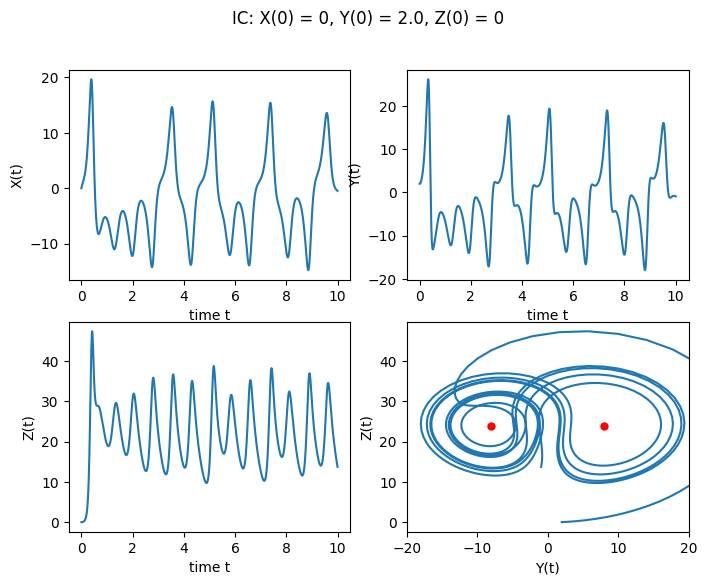

In [21]:
# import numpy as np
# import matplotlib.pyplot as plt
# from euler import euler  # Assuming you have a function called euler in a module named euler
# import matplotlib.animation as animation

# # Define constants
# sigma = 10
# b = 8/3
# r = 25  # Keep r fixed at 25

# # Time parameters
# t0 = 0
# tmax = 10
# dt = 0.01

# # Initial X and Z conditions
# x_initial = [0, 1, 0]

# # Function to calculate the Lorenz system's evolution based on initial Y
# def calculate_lorenz(initial_y):
#     x0 = [0, initial_y, 0]
    
#     F = lambda t, x: np.array(
#         [-sigma * x[0] + sigma * x[1],
#          -x[0] * x[2] + r * x[0] - x[1],
#          x[0] * x[1] - b * x[2]]
#     )
    
#     # Solve using the Euler method
#     t, x1 = euler(F, x0, t0, tmax, dt)
#     return t, x1

# # Create the figure and axis for the plot
# fig, ax = plt.subplots(2, 2, figsize=(8, 6))

# # Initialization function for the animation
# def init():
#     for a in ax.flatten():
#         a.clear()
#     ax[0, 0].set_xlabel("time t")
#     ax[0, 0].set_ylabel("X(t)")
#     ax[0, 1].set_xlabel("time t")
#     ax[0, 1].set_ylabel("Y(t)")
#     ax[1, 0].set_xlabel("time t")
#     ax[1, 0].set_ylabel("Z(t)")
#     ax[1, 1].set_xlabel("Y(t)")
#     ax[1, 1].set_ylabel("Z(t)")
#     ax[1, 1].set_xlim(-20, 20)

# # Update function for the animation
# def update(initial_y):
#     t, x1 = calculate_lorenz(initial_y)

#     # Clear the axes
#     for a in ax.flatten():
#         a.clear()

#     # X(t) plot
#     ax[0, 0].plot(t, x1[:, 0])
#     ax[0, 0].set_xlabel("time t")
#     ax[0, 0].set_ylabel("X(t)")

#     # Y(t) plot
#     ax[0, 1].plot(t, x1[:, 1])
#     ax[0, 1].set_xlabel("time t")
#     ax[0, 1].set_ylabel("Y(t)")

#     # Z(t) plot
#     ax[1, 0].plot(t, x1[:, 2])
#     ax[1, 0].set_xlabel("time t")
#     ax[1, 0].set_ylabel("Z(t)")

#     # Phase space Y(t) vs Z(t)
#     fixed = np.sqrt(b * (r - 1))
#     ax[1, 1].plot(x1[:, 1], x1[:, 2])
#     ax[1, 1].plot(fixed, r - 1, color="r", marker="o", markersize=5)
#     ax[1, 1].plot(-fixed, r - 1, color="r", marker="o", markersize=5)
#     ax[1, 1].set_xlabel("Y(t)")
#     ax[1, 1].set_ylabel("Z(t)")
#     ax[1, 1].set_xlim(-20, 20)
#     fig.suptitle(f"IC: X(0) = 0, Y(0) = {np.round(initial_y, decimals=2)}, Z(0) = 0")

# # Create the animation object
# initial_ys = np.arange(1, 2.01, 0.01)  # Y from 1 to 1.6 in steps of 0.01
# ani = animation.FuncAnimation(
#     fig, update, frames=initial_ys, init_func=init, repeat=False
# )

# # Save the animation as a GIF using PillowWriter
# ani.save('lorenz_animation.gif', writer='pillow', fps=5)

# plt.show()


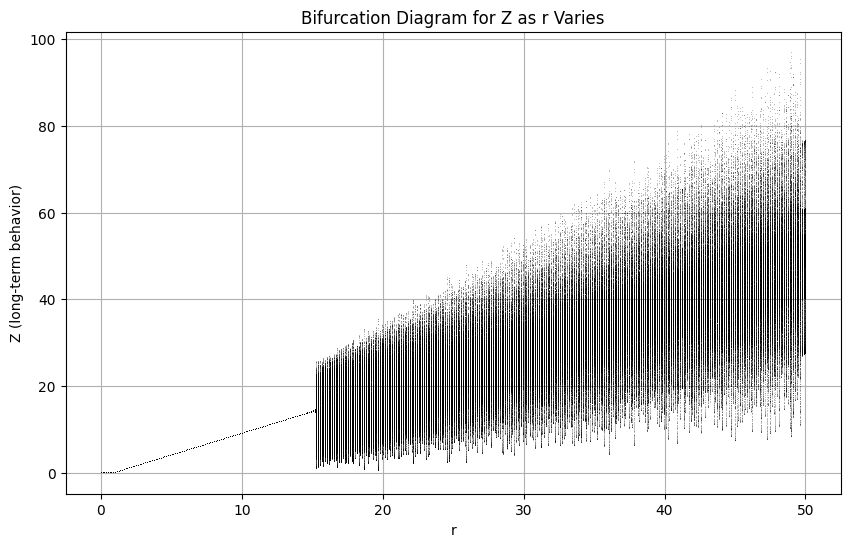

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from euler import euler  # Assuming you have a function called euler in a module named euler
import ipywidgets as widgets
from ipywidgets import interact

# Define the constants for the Lorenz system
sigma = 10
b = 8/3

# Time parameters
t0 = 0
tmax = 50  # Maximum time for time series and phase space
dt = 0.01

# Initial conditions (X(0), Y(0), Z(0))
x0 = [0, 1, 0]


# Function to plot the bifurcation diagram for Z as r varies
def plot_bifurcation_diagram():
    # Extend time for bifurcation analysis
    tmax_bif = 100  
    r_values = np.linspace(0, 50, 400)  # Range of r values for bifurcation diagram
    z_final_values = []  # To store long-term Z values

    # Loop through r values
    for r_val in r_values:
        # Update ODE function with current r value
        F = lambda t, x: np.array(
            [-sigma * x[0] + sigma * x[1],
             -x[0] * x[2] + r_val * x[0] - x[1],
             x[0] * x[1] - b * x[2]
            ]
        )

        # Solve ODEs with the same initial condition for each r
        t, x_sol = euler(F, x0, t0, tmax_bif, dt)
        
        # Collect the long-term Z values after discarding the transient phase
        z_long_term = x_sol[int(0.8 * len(t)):, 2]  # Discard the first 80% as transients
        
        # Store the Z values (plot each r-value with its corresponding Z values)
        z_final_values.append((r_val, z_long_term))
    
    # Plot bifurcation diagram: plot the long-term Z values vs r
    plt.figure(figsize=(10, 6))
    
    for r_val, z_vals in z_final_values:
        plt.plot([r_val] * len(z_vals), z_vals, ',k', alpha=0.25)
    
    plt.title("Bifurcation Diagram for Z as r Varies")
    plt.xlabel("r")
    plt.ylabel("Z (long-term behavior)")
    plt.grid(True)
    plt.show()

plot_bifurcation_diagram()
